In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import yfinance as yf
import heapq

In [2]:
def get_daily_ohlcv(tickers, years=4):
    outo=[]
    outh=[]
    outl=[]
    outc=[]
    outv=[]
    oute=[]
    outdf=[]
    months=str(years*12)
    for ticker in tickers:
        tick=yf.Ticker(ticker)
        df=tick.history(period=months+"mo")
        df=df.reset_index()
        df.dropna(inplace=True)
        outdf.append(df)
    return outdf

In [3]:
def concat_tickers(tickers):
    out=""
    for ticker in tickers:
        out=out+" "+ticker
    return out

In [4]:
def addNS(ticks):
    return [tick+'.NS' for tick in ticks]
s = np.random.normal(0, 1, 1000)
s2 = np.random.normal(0, 1, 1000)

In [5]:
def sh(a):
    a2=a.copy()
    np.random.shuffle(a2)
    return a2

def aggsh(a):
    out=[a[0]]+list(sh(di(a)))
    return accumulate(out)

def sharpe(a):
    return np.mean(a)/np.std(a)

def sharpe2(agg):
    a=di(agg)
    return sharpe(a)*np.sqrt(len(a))

def sigrobust(sigactual,mush,sigmash):
    return np.sign(sigactual)*(abs(sigactual)-mush)/sigmash

def di(a):
    return np.asarray([a[i+1]-a[i] for i in range(len(a)-1)])

In [6]:
def getleneq(array):
    lens=[len(x) for x in array] 
    maxlen=max(lens)
    out=[]
    for lst in array:
        if len(lst)==maxlen:
            out.append(lst)
    return maxlen,np.asarray(out)
def listsum(vecs):
    vecs=getleneq(vecs)[1]
    out=np.asarray(vecs[0])
    for i in range(1,len(vecs)):
        out=out+np.asarray(vecs[i])
    return np.asarray(out)

def accumulate(a):
    out=[a[0]]
    for i in range(1,len(a)):
        out.append(out[i-1]+a[i])
    return np.asarray(out)

def listmean(a):
    return [np.mean(a[i]) for i in range(len(a))]

def klargest(nums, k):
    h = []
    for e in nums:
        heapq.heappush(h, (-e, e))
    klarg=[]
    for i in range(k):
        w, e = heapq.heappop(h)
        klarg.append(e)
    return np.asarray(klarg)

def trunc_sig(signals,trades=5):
    klargabs=klargest(abs(signals),trades)
    out=[]
    for i in range(len(signals)):
        if abs(signals[i]) in klargabs:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])


def trunc_siglo(signals,trades=5):
    klarg=klargest(signals,trades)
    out=[]
    for i in range(len(signals)):
        if signals[i] in klarg and signals[i]>0:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])

def my_kendall_trend(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(np.sign(a[i]-a[j]))
    numpos=len([el for el in out if el>0 ])
    numneg=len([el for el in out if el<0 ])
    return (numpos-numneg)/len(out)

def di_atoa(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out


def di_atoa2(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out/np.std(a)

def ns_mean(a,opt=3):
    if opt==-1:
        return np.mean(a)
    
    if opt==0:
        return np.mean(a)-np.mean(di(a))
    
    elif opt==1:
        halflen=round(len(a)/2)
        if abs(np.mean(a[:halflen]))<=abs(np.mean(a[halflen:])):
            return np.mean(a[:halflen])
        else:
            return 0
    elif opt==2:
        return np.mean(a)-np.mean(di_atoa(a))
    elif opt==3:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==4:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna*kt
        else:
            return 0
    elif opt==5:
        return kalman_mean(a)
    elif opt==-2:
        return np.mean(a)+np.mean(di_atoa(a))
    elif opt==-3:
        kt=np.mean(di_atoa(a))
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==-4:
        return np.mean(a)+np.mean(di_atoa2(a))
    
    elif opt==-5:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-6:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        kt3=np.mean(di_atoa(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
    elif opt==-7:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-8:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        kt3=np.mean(my_kendall_trend(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
        

def sk_minfo(x,y,norm=True):
    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0] 
    iXY=metrics.mutual_info_score(None,None,contingency=cXY) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0]) 
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return iXY


def sk_mic(x,y,norm=True):
    estbins=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    bXYs=[i for i in range(20)]
    iXYs=[]
    for bXY in bXYs:
        cXY=np.histogram2d(x,y,bXY)[0] 
        iXYs.append(metrics.mutual_info_score(None,None,contingency=cXY)) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0])
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return max(iXYs)


def numBins(nObs,corr=None): 
    if corr is None: 
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.) 
        b=round(z/6.+2./(3*z)+1./3) 
    else:  
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5) 
        b=min(b,50)
    return int(b)

def eqwt_memb(logrets,lb=10,cost=0.0,long=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if long:
            pred=np.ones(len(lrs[:,-2+i:i]))
        else:
            pred=-np.ones(len(lrs[:,-2+i:i]))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def random_memb(logrets,lb=10,cost=0.0,longonly=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        randsh=sh(np.arange(len(lrs)))[0]
        randsgn=sh([1,-1])[0]
        if longonly:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])
        else:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])*randsgn
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        #
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def perment(a,m=4,tau=1):    
    return entrp.permutation_entropy(a,m,tau)
def sampent(ts,m=4,r=0.2):
    std_ts = np.std(ts)
    return entrp.sample_entropy(ts, m, r * std_ts)


In [7]:
def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        ret = ret - np.mean(ret)
    dot_prod = np.mean(np.sign(reg[:-delay]*ret2[delay:]))*np.sign(reg[-1])
    return dot_prod


def theta_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2th(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def perm_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def corrcoef_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(np.corrcoef(reg,sh(ret))[0][1])
    return np.mean(outsh)

def skminfo_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sk_minfo(reg,sh(ret)))
    return np.mean(outsh)

def thetamem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(theta_mem(reg,sh(ret))))
    return np.mean(outsh)

def perm_mem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(perm_mem(reg,sh(ret))))
    return np.mean(outsh)


In [8]:
def tp_memb(alphas,logrets,lbmom=20,lf=1,trades=-1,cost=0.0,signed=False,longonly=True,nsopt=-1):
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lbmom,n-mmax-1,mmax+1):
        if signed:
            
            pred=np.sign(listmean(alphas[:,-lbmom+i:i]))
        else:
            
            pred=listmean(alphas[:,-lbmom+i:i])
        if longonly:
            pred=np.heaviside(pred,0)*pred
        if trades>0:
            pred=trunc_siglo(pred,trades)
        
        pred=np.nan_to_num(pred,nan=0)
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=np.asarray(listmean(lrs[:,i:i+lf]))
        out.append(np.dot(pred,np.e**(y)-1))
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    dot_prod = ns_mean(np.sign(reg[:-delay]*ret2[delay:]),nsopt)*np.sign(reg[-1])
    return dot_prod

def multibinfunc2th(reg,ret,dmn=True,opt=0,trig=0,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    if opt==0:
        dot_prod = ns_mean(np.heaviside(np.sign(reg[:-delay])*np.sign(reg[-1]),0)*np.sign(ret2[delay:]),nsopt)
    if abs(dot_prod)>trig:
        return dot_prod
    else:
        return 0

def multibinpred2(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibinpred2th(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2th(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibin2pt_memb(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False,delay=1):
    
    mmax=0
    n,lrs=getleneq(logrets)
    n,rgs=getleneq(regs)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if th:
            pred=multibinpred2th(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        else:
            pred=multibinpred2(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        if trades>0:
            if longonly:
                pred=np.asarray(trunc_siglo(pred,trades))
            else:
                pred=np.asarray(trunc_sig(pred,trades))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        y=lrs[:,i]
       
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def multibin2pt_membml(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False):
    mb1=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=1)
    mb2=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=2)
    mb3=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=3)
    mb4=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=4)
    mb5=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=5)
    return (mb1+mb2+mb3+mb4+mb5)/5

In [9]:
def get_signalact(alphas,logrets,lb=20,delay=1,trades=-1,nsopt=-1,dmn=True,longonly=True,th=False):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=nsopt,th=th,longonly=longonly,dmn=dmn,delay=delay)
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=trades,longonly=longonly)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
        thm=theta_mem(alpha,returns)
        pm=perm_mem(alpha,returns)
        
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem


def get_signalsh(alphas,logrets,lb=20,delay=1):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb)
    tpmem=tp_memb(alphas,logrets,lbmom=lb)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        try:
            outminfo.append(skminfo_sh(np.asarray(alpha[:-1]),np.asarray(returns[1:])))
        except:
            outminfo.append(0)
        thm=thetamem_sh(alpha,returns)
        pm=permmem_sh(alpha,returns)
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem   

In [10]:
def get_signalact2(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=1,longonly=longonly)
    tpmem2=tp_memb(alphas,logrets,lbmom=lb,trades=5,longonly=longonly)
    multimem1=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem2=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem3=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem4=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem5=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem6=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem7=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem8=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=True)
    
    eqmem=eqwt_memb(logrets)
    
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [11]:
def get_signalact2_random(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    #alphas may take some training data; so log returns can be adjusted accordingly
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=random_memb(logrets)
    tpmem2=random_memb(logrets)
    multimem1=random_memb(logrets)
    multimem2=random_memb(logrets)
    multimem3=random_memb(logrets)
    multimem4=random_memb(logrets)
    multimem5=random_memb(logrets)
    multimem6=random_memb(logrets)
    multimem7=random_memb(logrets)
    multimem8=random_memb(logrets)
    eqmem=eqwt_memb(logrets)
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],sh(returns[delay:]))[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],sh(returns[delay:])))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [12]:
from scipy.stats import rankdata
def rankdata_2d(array2d,axis=0):
    """
    Input: 2d array
    Output:
    axis=0: time series rank
    axis=1: cross sectional rank
    """
    if axis==0:
        return np.asarray([rankdata(array1d) for array1d in array2d])
    elif axis==1:
        array2dt=np.transpose(array2d)
        return np.transpose([rankdata(array1d) for array1d in array2dt])
    
# RTime Series Rank
def ts_rank(qty,window=10):
    n,qty=getleneq(qty)[1]
    out=[]
    for i in range(n):
        out.append(rankdata_2d(qty[:,i-window:i])[:,-1])
    return out

# Cross Sectional Rank, also called 'Rank' by Kakushadze
def cs_rank(qty):
    """
    Input: 2-d array of qty
    Output: 2-d array of ranks
    """
    n,qty=getleneq(qty)
    return rankdata_2d(qty,axis=1)

#Calculate and store the Log Returns
def logrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def idlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Intraday Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Open']))
    return getleneq(sectalpha1)[1]

def onlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Overnight Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Open']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def get_opens(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Open'])
    return getleneq(sectalpha1)[1]

def get_volumes(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Volume'])
    return getleneq(sectalpha1)[1]

In [13]:
tickers_ltp= ['TSLA', 'ROKU', 'MRNA', 'PDD', 'NVDA', 'ETSY', 'FB', 'SQ', 'BA',
       'DIS', 'PLUG', 'IWM', 'XBI', 'MSFT', 'QQQ', 'AAPL', 'BABA', 'FSLY',
       'PYPL', 'SPY', 'TSM', 'CHWY', 'JPM', 'AMAT', 'XOP', 'SNAP', 'QCOM',
       'NET', 'IBB', 'MU', 'AXP', 'CVX', 'V', 'BRK.B', 'UBER', 'ABBV',
       'JD', 'TWTR', 'LYFT', 'KSS', 'CZR', 'MPC', 'XLK', 'SBUX', 'COF',
       'VLO', 'JNJ', 'MA', 'WDC', 'IBM']

In [14]:
data=get_daily_ohlcv(tickers_ltp, 4)

- BRK.B: No data found, symbol may be delisted


In [15]:
len(data)

50

In [16]:
type(data)

list

----------------------------

In [17]:
import talib as ta

In [18]:
# ADX - Average Directional Movement Index
# NOTE: The ADX function has an unstable period.
# real = ADX(high, low, close, timeperiod=14)

def mi1(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.ADX(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            b=np.nan_to_num(a,0)
            mi.append(np.asarray(b))
    return getleneq(mi)[1]
mi1(data)

array([[ 0.        ,  0.        ,  0.        , ..., 17.86388536,
        17.92930956, 17.0003893 ],
       [ 0.        ,  0.        ,  0.        , ..., 16.70769171,
        16.33089749, 16.46683645],
       [ 0.        ,  0.        ,  0.        , ..., 12.74002285,
        11.84864757, 11.35595852],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 20.51149367,
        21.52087529, 22.22029884],
       [ 0.        ,  0.        ,  0.        , ..., 18.28785867,
        19.72623689, 20.86047985],
       [ 0.        ,  0.        ,  0.        , ..., 20.86142322,
        20.24726048, 19.04892537]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


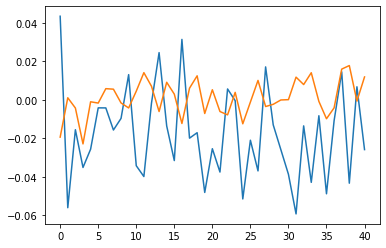

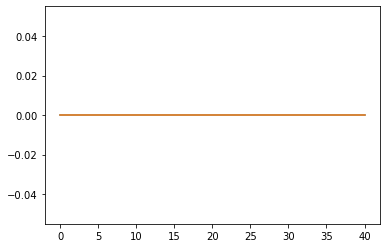

Wall time: 5min 16s


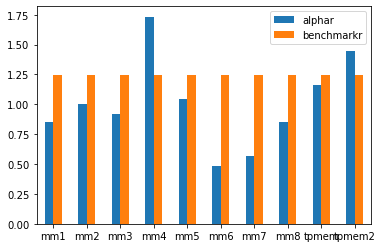

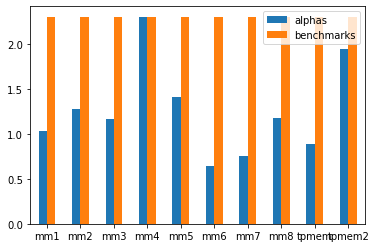

In [19]:
%%time
sig=get_signalact2(mi1(data), logrets(data), delay=1)

In [52]:
# ADXR - Average Directional Movement Index Rating
# NOTE: The ADXR function has an unstable period.
# real = ADXR(high, low, close, timeperiod=14)

def mi2(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            c=ta.ADXR(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            d=np.nan_to_num(c, 0)
            mi.append(np.asarray(d))
    return getleneq(mi)[1]

mi2(data)

array([[ 0.        ,  0.        ,  0.        , ..., 15.17827238,
        15.14338675, 14.87030789],
       [ 0.        ,  0.        ,  0.        , ..., 20.40914917,
        19.62409358, 19.07221011],
       [ 0.        ,  0.        ,  0.        , ..., 14.84811298,
        13.84789122, 13.94362693],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 17.69024375,
        18.26960696, 18.36049977],
       [ 0.        ,  0.        ,  0.        , ..., 20.43513776,
        21.02284204, 21.41734831],
       [ 0.        ,  0.        ,  0.        , ..., 21.17517149,
        20.44235378, 19.22342011]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


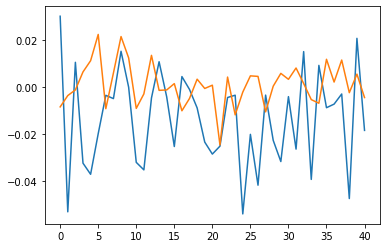

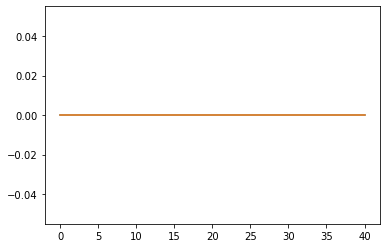

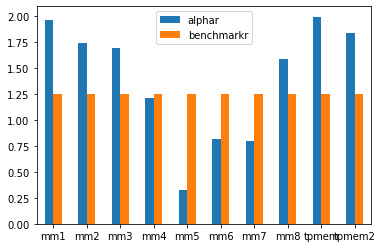

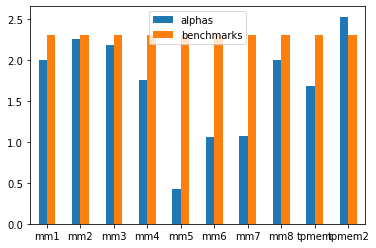

In [53]:
sig=get_signalact2(mi2(data), logrets(data), delay=1)

In [54]:
# APO - Absolute Price Oscillator
# real = APO(close, fastperiod=12, slowperiod=26, matype=0)

def mi3(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            e=ta.APO(np.asarray(list(data[i]['Close'])), fastperiod=12, slowperiod=26, matype=0)
            f=np.nan_to_num(e, 0)
            mi.append(np.asarray(f))
    return getleneq(mi)[1]

mi3(data)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.76667958e+01,  2.66448090e+01,  2.41349374e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.46705178e+00,  3.83846166e+00,  3.71217933e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.33531923e+00, -2.43615185e+00, -2.36544653e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.87211452e+00, -9.29038356e+00, -9.60749954e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.67943778e-02,  1.23722125e-02,  5.45514914e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38521781e+00,  1.52120003e+00,  1.46257870e+00]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


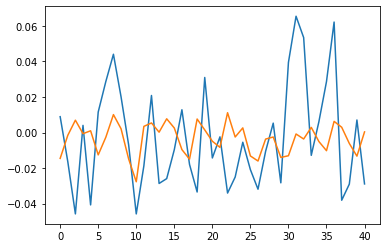

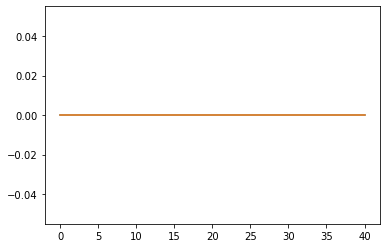

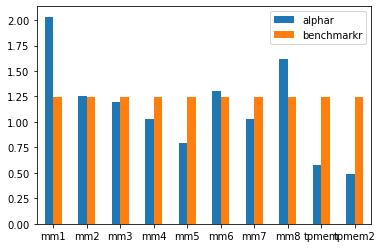

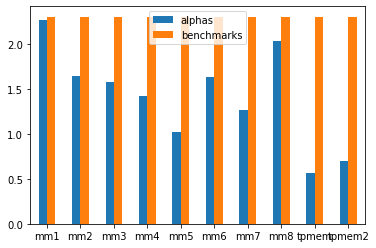

In [55]:
sig=get_signalact2(mi3(data), logrets(data), delay=1)

In [18]:
# AROON - Aroon
# aroondown, aroonup = AROON(high, low, timeperiod=14)

def mi4(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            aroondown, aroonup =ta.AROON(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            ad=np.nan_to_num(aroondown, 0)
            au=np.nan_to_num(aroonup, 0)
            ax=au-ad
            af=np.nan_to_num(ax,0)
            mi.append(np.asarray(af))
    return getleneq(mi)[1]

mi4(data)

array([[   0.        ,    0.        ,    0.        , ...,  -14.28571429,
         -14.28571429,  -14.28571429],
       [   0.        ,    0.        ,    0.        , ...,    7.14285714,
          14.28571429,   14.28571429],
       [   0.        ,    0.        ,    0.        , ...,   -7.14285714,
          -7.14285714,   -7.14285714],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -100.        ,
         -92.85714286,  -71.42857143],
       [   0.        ,    0.        ,    0.        , ...,  -71.42857143,
         -71.42857143,  -71.42857143],
       [   0.        ,    0.        ,    0.        , ...,  -21.42857143,
         -21.42857143,  -21.42857143]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


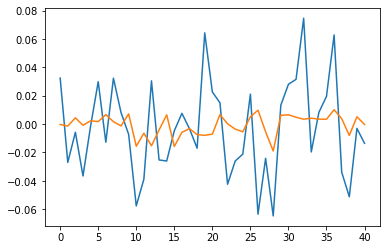

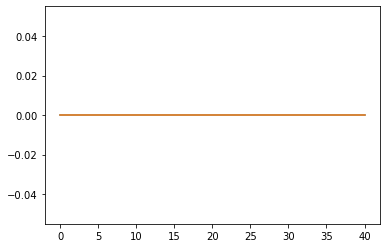

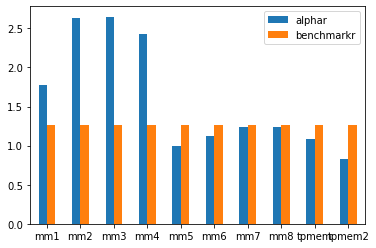

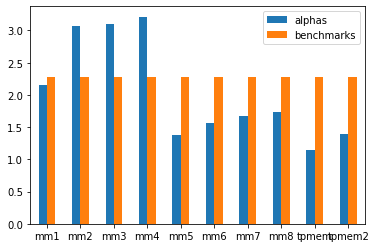

In [19]:
sig=get_signalact2(mi4(data), logrets(data), delay=1)

In [61]:
# AROONOSC - Aroon Oscillator
# real = AROONOSC(high, low, timeperiod=14)

def mi5(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            g=ta.AROONOSC(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            h=np.nan_to_num(g, 0)
            mi.append(np.asarray(h))
    return getleneq(mi)[1]
        
mi5(data)

array([[   0.        ,    0.        ,    0.        , ...,   92.85714286,
          85.71428571,   78.57142857],
       [   0.        ,    0.        ,    0.        , ...,   50.        ,
          42.85714286,  -64.28571429],
       [   0.        ,    0.        ,    0.        , ...,  -50.        ,
          -7.14285714,   -7.14285714],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -100.        ,
         -85.71428571,  -85.71428571],
       [   0.        ,    0.        ,    0.        , ...,  -28.57142857,
         -50.        ,  -50.        ],
       [   0.        ,    0.        ,    0.        , ...,   78.57142857,
          78.57142857,   78.57142857]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


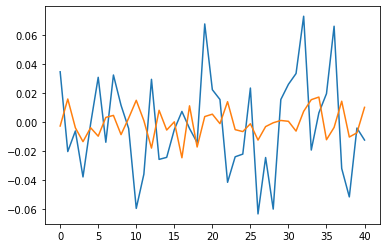

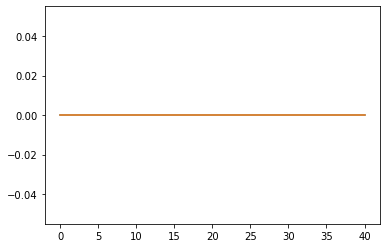

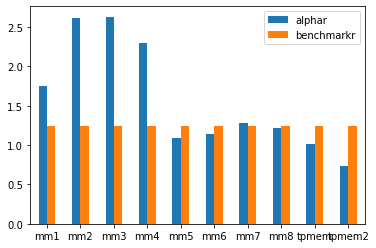

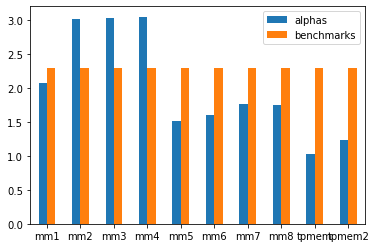

In [62]:
sig=get_signalact2(mi5(data), logrets(data), delay=1)

In [68]:
# BOP - Balance Of Power
# real = BOP(open, high, low, close)

def mi6(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            i=ta.BOP(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            j=np.nan_to_num(i, 0)
            mi.append(np.asarray(j))
    return getleneq(mi)[1]

mi6(data)

array([[-0.5697937 ,  0.04517327,  0.90717888, ..., -0.57099814,
        -0.27000598,  0.72831315],
       [-0.59856819,  0.66883329,  0.85185394, ..., -0.22182337,
        -0.45129321, -0.72595354],
       [-0.41666468,  0.52173967,  0.63636285, ..., -0.17025029,
         0.83517975, -0.42466729],
       ...,
       [ 0.61458499,  0.65816537, -0.13578479, ...,  0.42559061,
         0.26338661, -0.04517038],
       [ 0.37606779,  0.78909024,  0.6428564 , ..., -0.21505451,
         0.01499939, -0.19700444],
       [ 0.57365065,  0.48052   ,  0.60759331, ...,  0.23840946,
        -0.28019313, -0.87824593]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


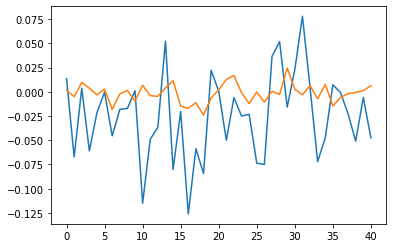

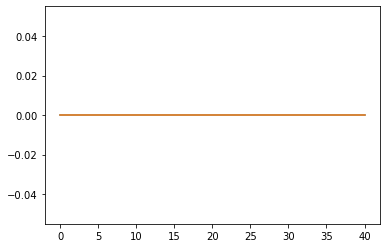

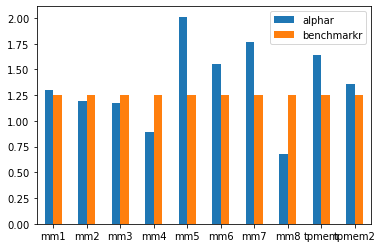

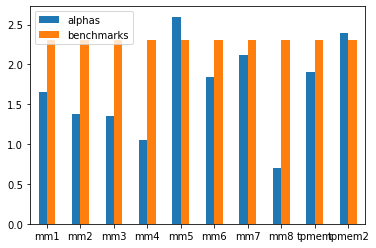

In [69]:
sig=get_signalact2(mi6(data), logrets(data), delay=1)

In [70]:
# CCI - Commodity Channel Index
# real = CCI(high, low, close, timeperiod=14)

def mi7(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            k=ta.CCI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            l=np.nan_to_num(k, 0)
            mi.append(np.asarray(l))
    return getleneq(mi)[1]

mi7(data)

array([[   0.        ,    0.        ,    0.        , ...,  -43.5622358 ,
        -181.43497495,  -96.29433532],
       [   0.        ,    0.        ,    0.        , ...,   -6.32930183,
        -103.06608398, -148.81871595],
       [   0.        ,    0.        ,    0.        , ...,   -8.05797124,
          37.43976667,   60.65326377],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  -93.1270831 ,
         -77.64145037,  -74.78692726],
       [   0.        ,    0.        ,    0.        , ..., -129.93820943,
        -154.83487826, -117.83144665],
       [   0.        ,    0.        ,    0.        , ...,  128.99960292,
          45.85541234, -107.79135382]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


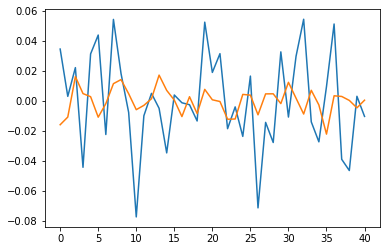

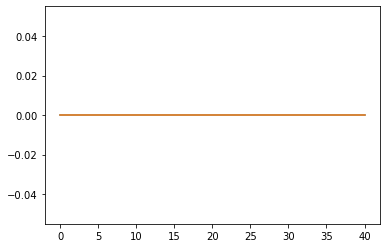

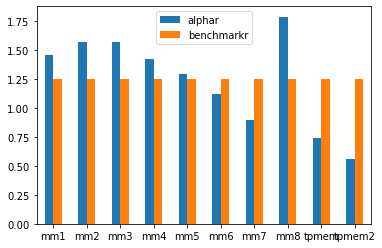

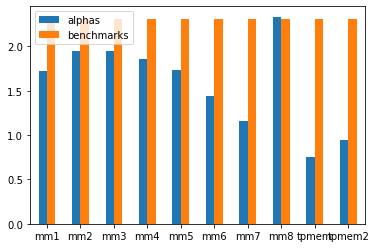

In [71]:
sig=get_signalact2(mi7(data), logrets(data), delay=1)

In [72]:
# CMO - Chande Momentum Oscillator
# NOTE: The CMO function has an unstable period.
# real = CMO(close, timeperiod=14)

def mi8(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            m=ta.CMO(np.asarray(list(data[i]['Close'])), timeperiod=14)
            n=np.nan_to_num(m, 0)
            mi.append(np.asarray(n))
    return getleneq(mi)[1]

mi8(data)

array([[  0.        ,   0.        ,   0.        , ...,   0.92306443,
        -11.58964046,   3.12750332],
       [  0.        ,   0.        ,   0.        , ...,   7.68821724,
         -5.23301783, -14.60759977],
       [  0.        ,   0.        ,   0.        , ...,  -0.50898224,
          5.25680417,  -0.29932373],
       ...,
       [  0.        ,   0.        ,   0.        , ..., -18.46165344,
        -18.98851092, -22.70477809],
       [  0.        ,   0.        ,   0.        , ..., -21.83764348,
        -24.75351777, -25.30299306],
       [  0.        ,   0.        ,   0.        , ...,  19.23380191,
          8.14948212, -13.64787149]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


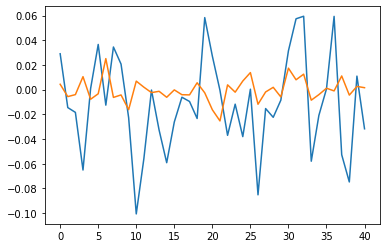

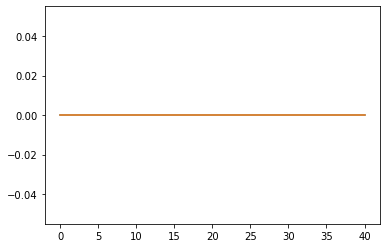

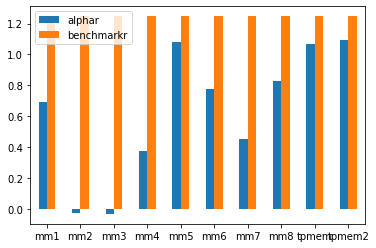

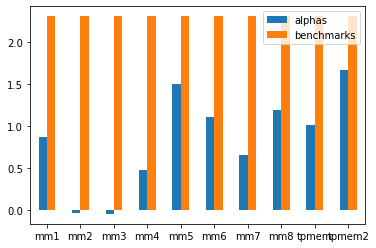

In [73]:
sig=get_signalact2(mi8(data), logrets(data), delay=1)

In [74]:
# DX - Directional Movement Index
# NOTE: The DX function has an unstable period.
# real = DX(high, low, close, timeperiod=14)

def mi9(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            o=ta.DX(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            p=np.nan_to_num(o, 0)
            mi.append(np.asarray(p))
    return getleneq(mi)[1]

mi9(data)

array([[ 0.        ,  0.        ,  0.        , ...,  3.36914762,
        18.77982411,  4.92442595],
       [ 0.        ,  0.        ,  0.        , ...,  6.39591381,
        11.43257262, 18.23404296],
       [ 0.        ,  0.        ,  0.        , ...,  4.28758551,
         0.26076893,  4.95100085],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 36.35153779,
        34.64283634, 31.31280489],
       [ 0.        ,  0.        ,  0.        , ..., 32.55657469,
        38.42515369, 35.60563841],
       [ 0.        ,  0.        ,  0.        , ..., 25.11261285,
        12.26314493,  3.47056899]])

1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


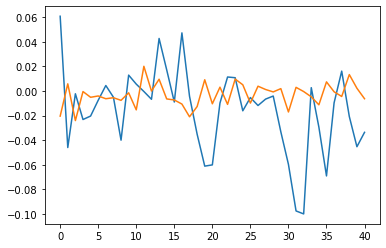

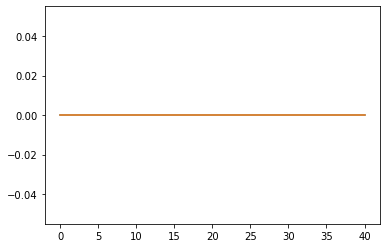

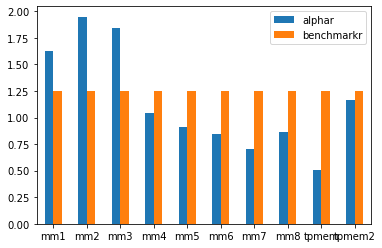

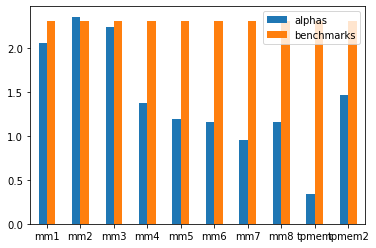

In [75]:
sig=get_signalact2(mi9(data), logrets(data), delay=1)

In [77]:
# MACD - Moving Average Convergence/Divergence
# macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

def mi10(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACD(np.asarray(list(data[i]['Close'])), fastperiod=12, slowperiod=26, signalperiod=9)
            q=np.nan_to_num(macd, 0)
            r=np.nan_to_num(macdsignal, 0)
            s=np.nan_to_num(macdhist, 0)
            mi.append(np.asarray(q))
    return getleneq(mi)[1]

mi10(data)

array([[ 0.        ,  0.        ,  0.        , ..., 14.70604622,
        10.84867419,  9.55997649],
       [ 0.        ,  0.        ,  0.        , ...,  2.54005455,
         1.95880449,  1.14763866],
       [ 0.        ,  0.        ,  0.        , ...,  0.05391724,
         0.32358772,  0.25197813],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -3.64258876,
        -3.84866082, -4.14813415],
       [ 0.        ,  0.        ,  0.        , ..., -1.09691084,
        -1.29781496, -1.45079902],
       [ 0.        ,  0.        ,  0.        , ...,  0.57648186,
         0.56871977,  0.32082983]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


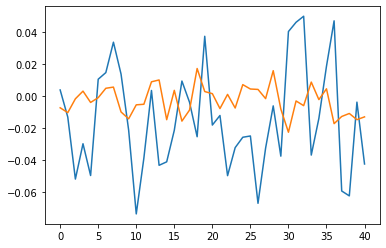

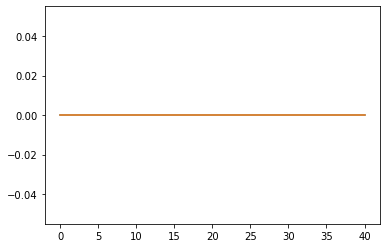

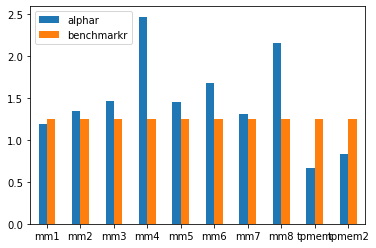

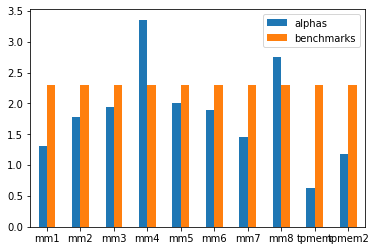

In [78]:
sig=get_signalact2(mi10(data), logrets(data), delay=1)

In [79]:
# MACDEXT - MACD with controllable MA type
# macd, macdsignal, macdhist = MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)

def mi11(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACDEXT(np.asarray(list(data[i]['Close'])), fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
            u=np.nan_to_num(macd, 0)
            v=np.nan_to_num(macdsignal, 0)
            w=np.nan_to_num(macdhist, 0)
            mi.append(np.asarray(u))
    return getleneq(mi)[1]
            
mi11(data)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.76667958e+01,  2.66448090e+01,  2.41349374e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.46705178e+00,  3.83846166e+00,  3.71217933e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.33531923e+00, -2.43615185e+00, -2.36544653e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.87211452e+00, -9.29038356e+00, -9.60749954e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.67943778e-02,  1.23722125e-02,  5.45514914e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38521781e+00,  1.52120003e+00,  1.46257870e+00]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


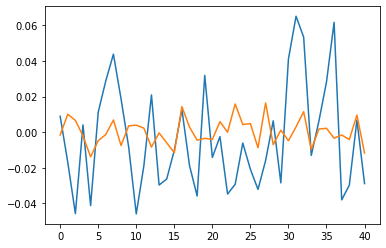

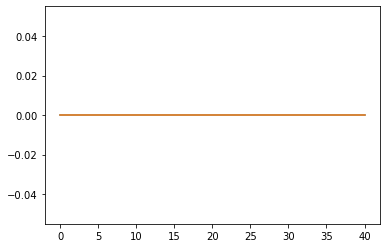

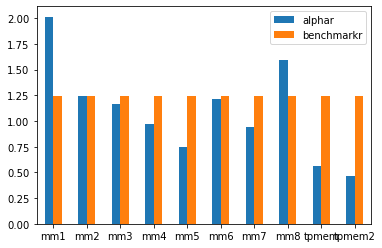

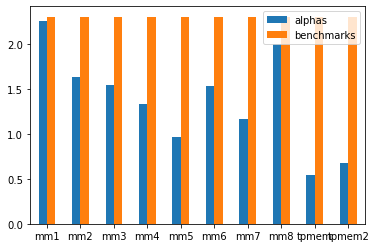

In [80]:
sig=get_signalact2(mi11(data), logrets(data), delay=1)

In [81]:
# MACDFIX - Moving Average Convergence/Divergence Fix 12/26
# macd, macdsignal, macdhist = MACDFIX(close, signalperiod=9)

def mi12(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACDFIX(np.asarray(list(data[i]['Close'])), signalperiod=9)
            x=np.nan_to_num(macd, 0)
            y=np.nan_to_num(macdsignal, 0)
            z=np.nan_to_num(macdhist, 0)
            mi.append(np.asarray(x))
    return getleneq(mi)[1]

mi12(data)

array([[ 0.        ,  0.        ,  0.        , ..., 14.03428383,
        10.40748305,  9.18482437],
       [ 0.        ,  0.        ,  0.        , ...,  2.41604282,
         1.86864081,  1.10372317],
       [ 0.        ,  0.        ,  0.        , ...,  0.05600592,
         0.30723328,  0.23880441],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -3.44248346,
        -3.64427841, -3.93294147],
       [ 0.        ,  0.        ,  0.        , ..., -1.04354256,
        -1.23261427, -1.37715507],
       [ 0.        ,  0.        ,  0.        , ...,  0.54293906,
         0.53728055,  0.30553737]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


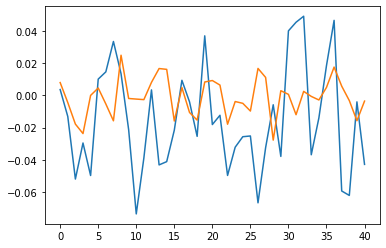

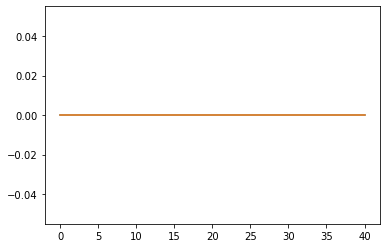

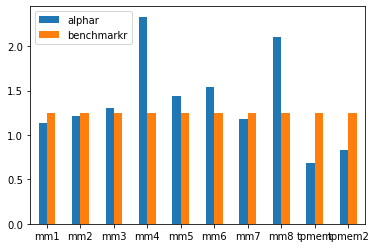

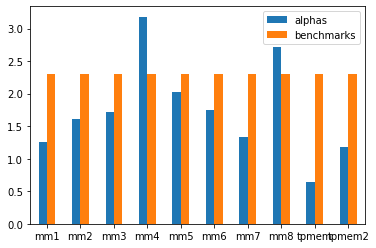

In [82]:
sig=get_signalact2(mi12(data), logrets(data), delay=1)

In [20]:
# MFI - Money Flow Index
# NOTE: The MFI function has an unstable period.
# real = MFI(high, low, close, volume, timeperiod=14)

def mi13(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            s=ta.MFI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), np.asarray((list(data[i]['Volume'])), dtype='f8'), timeperiod=14)
            x=np.nan_to_num(s, 0)
            mi.append(np.asarray(x))
    return getleneq(mi)[1]

mi13(data)

array([[ 0.        ,  0.        ,  0.        , ..., 48.94205949,
        57.994084  , 57.2283678 ],
       [ 0.        ,  0.        ,  0.        , ..., 64.74645276,
        67.45166614, 68.12458647],
       [ 0.        ,  0.        ,  0.        , ..., 56.10956977,
        50.66875506, 45.66142007],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 21.96794345,
        31.88875759, 39.3340423 ],
       [ 0.        ,  0.        ,  0.        , ..., 39.47142535,
        39.06454847, 38.77372229],
       [ 0.        ,  0.        ,  0.        , ..., 45.07445705,
        43.79158777, 49.28075134]])

1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


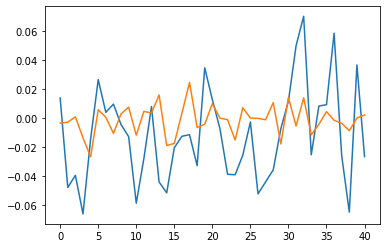

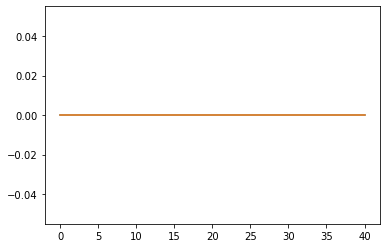

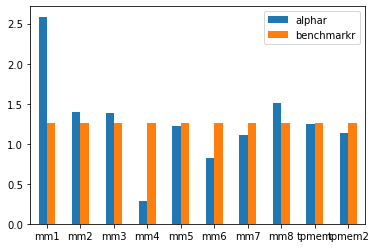

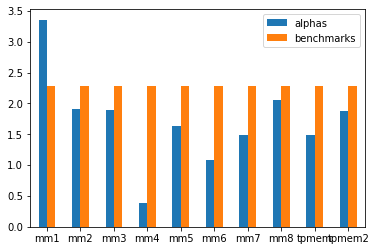

In [21]:
sig=get_signalact2(mi13(data), logrets(data), delay=1)

In [85]:
# MINUS_DI - Minus Directional Indicator
# NOTE: The MINUS_DI function has an unstable period.
# real = MINUS_DI(high, low, close, timeperiod=14)

def mi14(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            ac=ta.MINUS_DI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            ad=np.nan_to_num(ac, 0)
            mi.append(np.asarray(ad))
    return getleneq(mi)[1]

mi14(data)

array([[ 0.        ,  0.        ,  0.        , ..., 25.60717649,
        31.05371544, 28.28337895],
       [ 0.        ,  0.        ,  0.        , ..., 22.82766657,
        23.18993603, 24.6285021 ],
       [ 0.        ,  0.        ,  0.        , ..., 25.17769243,
        23.65515659, 22.22484272],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 34.92617333,
        33.3675738 , 31.70631998],
       [ 0.        ,  0.        ,  0.        , ..., 30.23306376,
        32.45856233, 30.75623325],
       [ 0.        ,  0.        ,  0.        , ..., 15.98347845,
        18.84966692, 22.97086552]])

1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


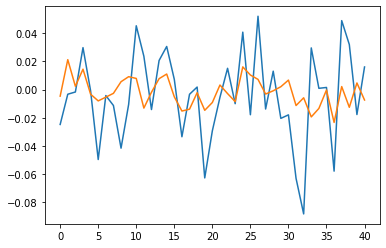

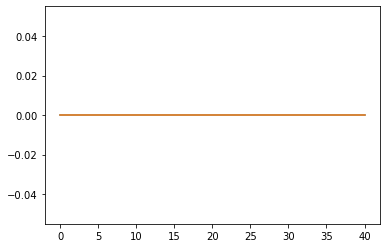

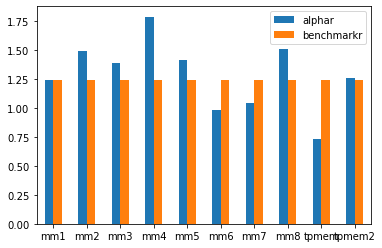

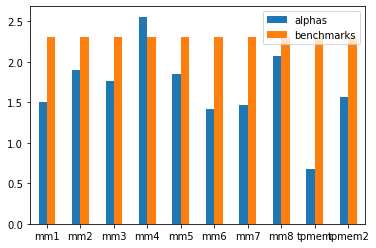

In [86]:
sig=get_signalact2(mi14(data), logrets(data), delay=1)

In [87]:
# MINUS_DM - Minus Directional Movement
# NOTE: The MINUS_DM function has an unstable period.
# real = MINUS_DM(high, low, timeperiod=14)

def mi15(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            ad=ta.MINUS_DM(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            ae=np.nan_to_num(ad, 0)
            mi.append(np.asarray(ae))
    return getleneq(mi)[1]

mi15(data)

array([[  0.        ,   0.        ,   0.        , ...,  80.84757904,
        102.63274953,  95.30183885],
       [  0.        ,   0.        ,   0.        , ...,  18.73804257,
         19.25961156,  20.55392319],
       [  0.        ,   0.        ,   0.        , ...,  30.41558567,
         28.24304383,  26.22568356],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  37.60460842,
         34.91856496,  32.42438175],
       [  0.        ,   0.        ,   0.        , ...,   9.9604413 ,
         10.57898304,   9.8233414 ],
       [  0.        ,   0.        ,   0.        , ...,   4.01624358,
          4.86936843,   6.20154908]])

1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


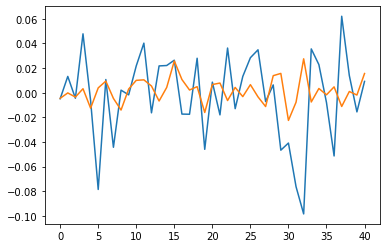

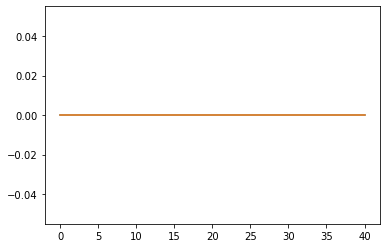

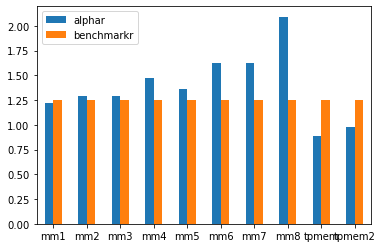

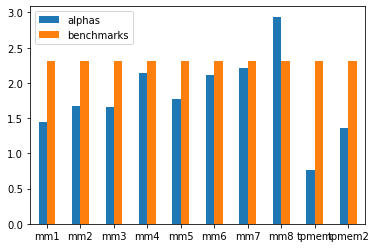

In [88]:
sig=get_signalact2(mi15(data), logrets(data), delay=1)

In [20]:
# real = MOM(close, timeperiod=10)

def mi16(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            out=ta.MOM(np.asarray(list(data[i]['Close'])), timeperiod=10)
            ou=np.nan_to_num(out, 0)
            mi.append(np.asarray(ou))
    return getleneq(mi)[1]
mi16(data)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.35000000e+01, -4.40299683e+01, -2.19299927e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00, -3.56999207e+00, -1.23400116e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.52999878e+00,  3.83999634e+00, -1.13000031e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.17000122e+01, -4.36999512e+00, -7.05999756e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.84000397e+00, -5.00000000e+00, -3.93000412e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.77960205e+00, -1.02386475e-02, -1.66513062e+00]])

In [21]:
len(mi16(data))

41

In [22]:
len(onlogrets(data))

41

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


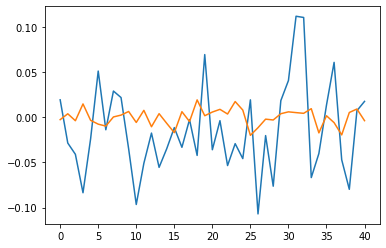

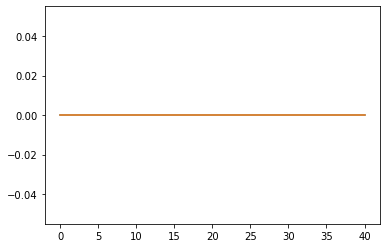

Wall time: 5min 23s


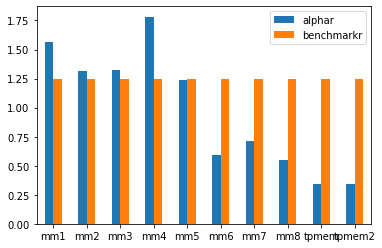

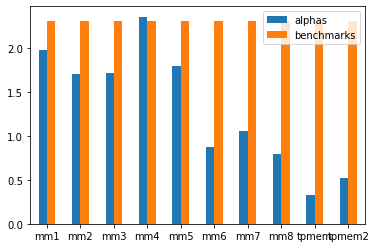

In [23]:
%%time
sig=get_signalact2(mi16(data), logrets(data), delay=1)

In [24]:
# real = PLUS_DI(high, low, close, timeperiod=14)

def mi17(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.PLUS_DI(np.asarray(list(data[i]['Close'])),np.asarray(list(data[i]['High'])),np.asarray(list(data[i]['Low'])), timeperiod=14)
            b=np.nan_to_num(a,0)
            mi.append(np.asarray(b))
    return getleneq(mi)[1]
        
mi17(data)        

array([[ 0.        ,  0.        ,  0.        , ..., 22.01587757,
        21.28319561, 25.13361833],
       [ 0.        ,  0.        ,  0.        , ..., 25.01520572,
        24.03214279, 22.91065988],
       [ 0.        ,  0.        ,  0.        , ..., 26.81861543,
        28.1856892 , 26.00257755],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 22.29408687,
        20.53268741, 19.29877493],
       [ 0.        ,  0.        ,  0.        , ..., 21.88010996,
        21.39522665, 19.77830249],
       [ 0.        ,  0.        ,  0.        , ..., 24.94404033,
        24.06387654, 22.56991843]])

1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


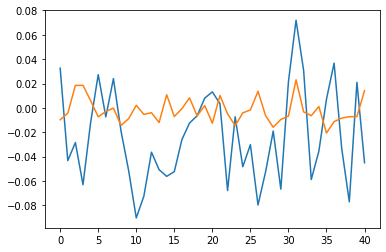

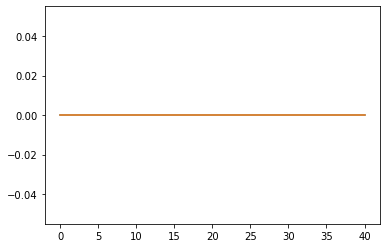

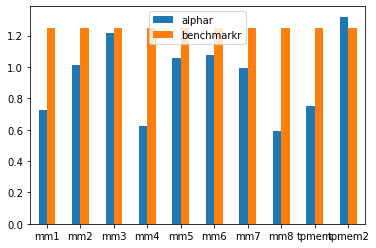

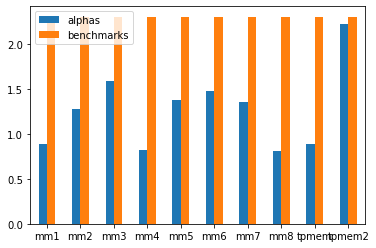

In [25]:
sig=get_signalact2(mi17(data), logrets(data), delay=1)

In [26]:
# real = PLUS_DM(high, low, timeperiod=14)

def mi18(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.PLUS_DM(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            v=np.nan_to_num(a, 0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi18(data)

array([[ 0.        ,  0.        ,  0.        , ..., 75.5773909 ,
        70.17900583, 86.35622214],
       [ 0.        ,  0.        ,  0.        , ..., 16.48519467,
        15.30768077, 14.214275  ],
       [ 0.        ,  0.        ,  0.        , ..., 27.91462788,
        28.39072711, 28.95781925],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 17.55371107,
        16.94986846, 16.9605686 ],
       [ 0.        ,  0.        ,  0.        , ...,  5.06777035,
         4.70578676,  4.6647603 ],
       [ 0.        ,  0.        ,  0.        , ...,  6.70984458,
         6.23056996,  5.78552925]])

1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


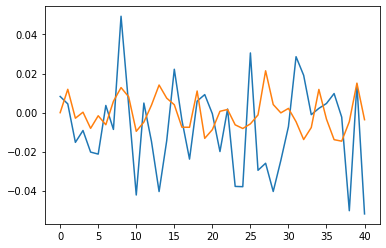

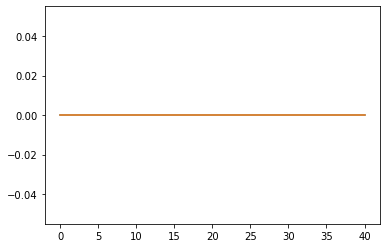

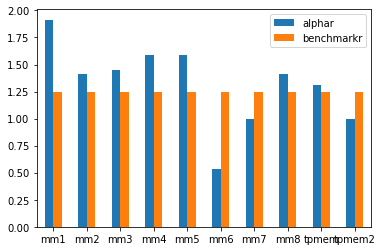

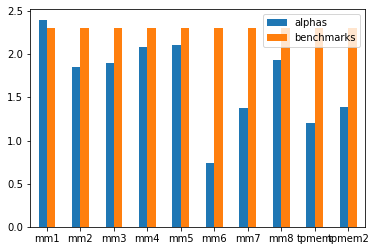

In [27]:
sig=get_signalact2(mi18(data), logrets(data), delay=1)

In [28]:
# real = PPO(close, fastperiod=12, slowperiod=26, matype=0)

def mi19(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            b=ta.PPO(np.asarray(list(data[i]['Close'])), fastperiod=12, slowperiod=26, matype=0)
            c=np.nan_to_num(b, 0)
            mi.append(np.asarray(c))
    return getleneq(mi)[1]

mi19(data)

array([[ 0.        ,  0.        ,  0.        , ...,  4.07043305,
         3.92451411,  3.55072161],
       [ 0.        ,  0.        ,  0.        , ...,  1.7617615 ,
         1.95451929,  1.89470707],
       [ 0.        ,  0.        ,  0.        , ..., -1.73487604,
        -1.2671715 , -1.22982803],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -2.08588302,
        -2.46478054, -2.55484629],
       [ 0.        ,  0.        ,  0.        , ..., -0.07159651,
         0.01903902,  0.08439981],
       [ 0.        ,  0.        ,  0.        , ...,  0.98691302,
         1.08287395,  1.04091987]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


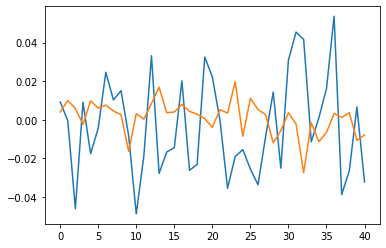

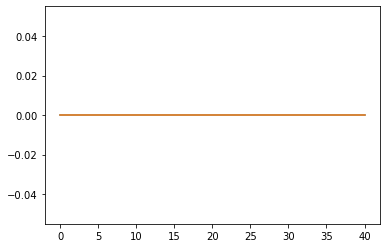

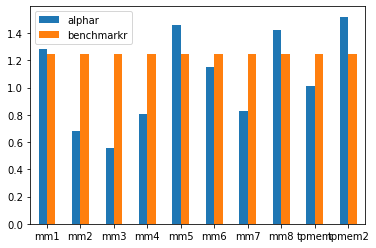

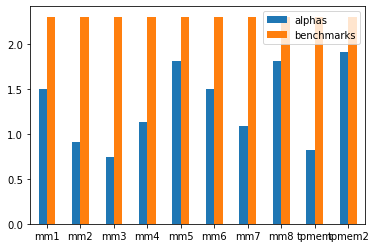

In [29]:
sig=get_signalact2(mi19(data), logrets(data), delay=1)

In [30]:
# real = ROC(close, timeperiod=10)

def mi20(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            f=ta.ROC(np.asarray(list(data[i]['Close'])), timeperiod=14)
            e=np.nan_to_num(f,0)
            mi.append(np.asarray(e))
    return getleneq(mi)[1]

mi20(data)

array([[ 0.        ,  0.        ,  0.        , ...,  6.41923629,
         2.89499553,  1.71846388],
       [ 0.        ,  0.        ,  0.        , ...,  3.86297277,
        -0.23073217, -3.16346322],
       [ 0.        ,  0.        ,  0.        , ..., -4.54180758,
        -4.25741563, -4.11096233],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -6.84397781,
        -5.27070502, -7.16544984],
       [ 0.        ,  0.        ,  0.        , ..., -0.81783536,
        -3.74685304, -5.35215764],
       [ 0.        ,  0.        ,  0.        , ...,  1.74648886,
         1.61503865, -0.60191464]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


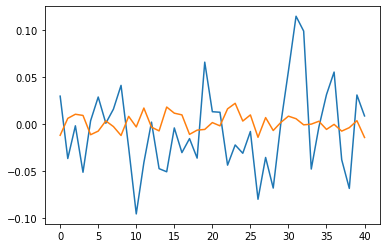

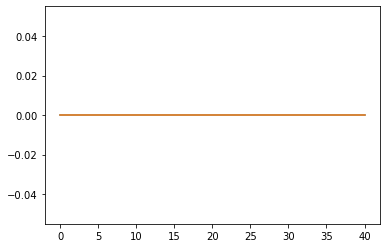

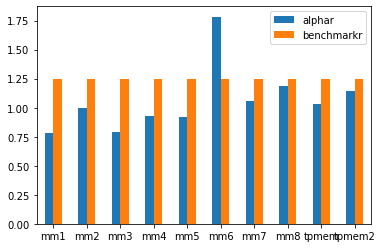

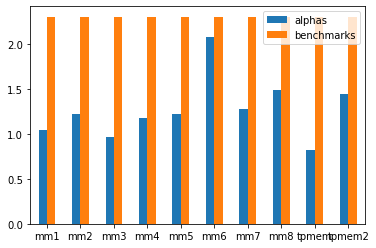

In [31]:
sig=get_signalact2(mi20(data), logrets(data), delay=1)

In [32]:
# real = ROCP(close, timeperiod=10)

def mi21(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            g=ta.ROCP(np.asarray(list(data[i]['Close'])), timeperiod=10)
            h=np.nan_to_num(g, 0)
            mi.append(np.asarray(h))
    return getleneq(mi)[1]
mi21(data)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.31139834e-02, -6.20367583e-02, -3.08473432e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.01265823e-02, -1.80166146e-02, -6.08661895e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.09994592e-03,  2.01616938e-02, -5.59129278e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.11784147e-02, -1.18879082e-02, -1.91842542e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.39017446e-02, -7.55972187e-02, -6.05174618e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.70337701e-02, -7.18853503e-05, -1.17981299e-02]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


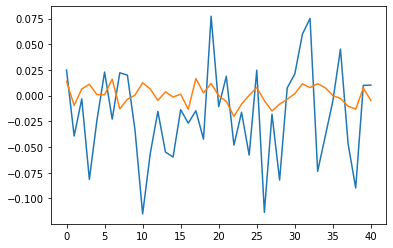

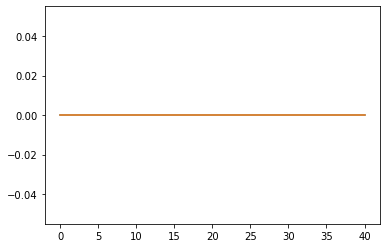

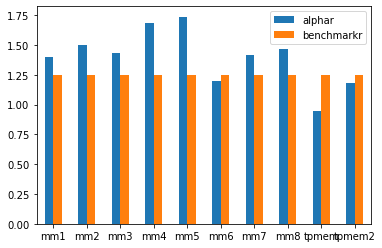

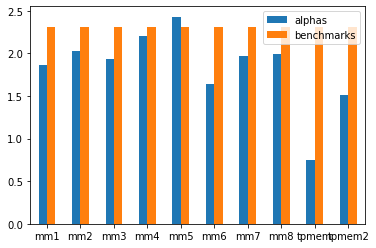

In [33]:
sig=get_signalact2(mi21(data), logrets(data), delay=1)

In [34]:
# real = ROCR(close, timeperiod=10)

def mi22(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            
            i=ta.ROCR(np.asarray(list(data[i]['Close'])), timeperiod=10)
            j=np.nan_to_num(i,0)
            mi.append(np.asarray(j))
    return getleneq(mi)[1]

mi22(data)

array([[0.        , 0.        , 0.        , ..., 0.96688602, 0.93796324,
        0.96915266],
       [0.        , 0.        , 0.        , ..., 1.01012658, 0.98198339,
        0.93913381],
       [0.        , 0.        , 0.        , ..., 1.00809995, 1.02016169,
        0.94408707],
       ...,
       [0.        , 0.        , 0.        , ..., 0.96882159, 0.98811209,
        0.98081575],
       [0.        , 0.        , 0.        , ..., 0.95609826, 0.92440278,
        0.93948254],
       [0.        , 0.        , 0.        , ..., 1.02703377, 0.99992811,
        0.98820187]])

1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


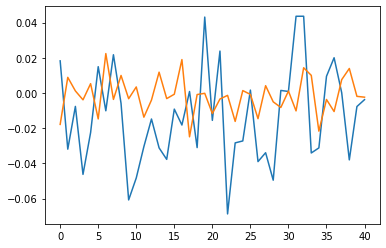

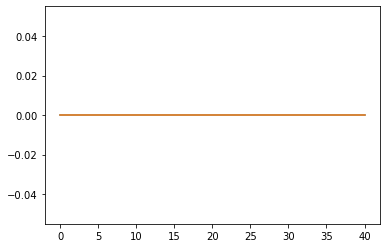

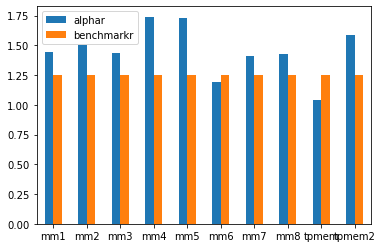

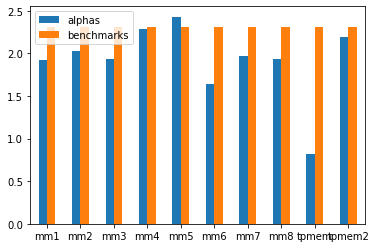

In [35]:
sig=get_signalact2(mi22(data), logrets(data), delay=1)

In [36]:
# real = ROCR100(close, timeperiod=10)

def mi23(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            u=ta.ROCR100(np.asarray(list(data[i]['Close'])), timeperiod=10)
            v=np.nan_to_num(u,0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi23(data)

array([[  0.        ,   0.        ,   0.        , ...,  96.68860166,
         93.79632417,  96.91526568],
       [  0.        ,   0.        ,   0.        , ..., 101.01265823,
         98.19833854,  93.91338105],
       [  0.        ,   0.        ,   0.        , ..., 100.80999459,
        102.01616938,  94.40870722],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  96.88215853,
         98.81120918,  98.08157458],
       [  0.        ,   0.        ,   0.        , ...,  95.60982554,
         92.44027813,  93.94825382],
       [  0.        ,   0.        ,   0.        , ..., 102.70337701,
         99.99281146,  98.82018701]])

1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


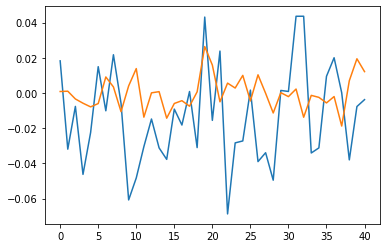

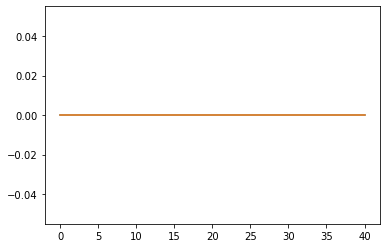

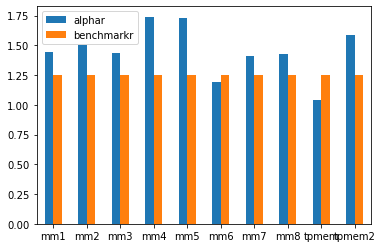

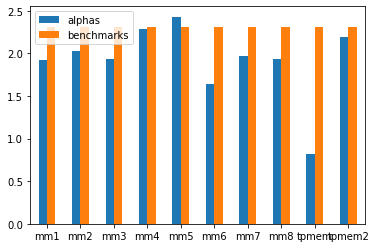

In [37]:
sig=get_signalact2(mi23(data), logrets(data), delay=1)

In [38]:
# real = RSI(close, timeperiod=14)

def mi24(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            e=ta.RSI(np.asarray(list(data[i]['Close'])), timeperiod=14)
            d=np.nan_to_num(e,0)
            mi.append(np.asarray(d))
    return getleneq(mi)[1]
mi24(data)

array([[ 0.        ,  0.        ,  0.        , ..., 50.46153221,
        44.20517977, 51.56375166],
       [ 0.        ,  0.        ,  0.        , ..., 53.84410862,
        47.38349109, 42.69620012],
       [ 0.        ,  0.        ,  0.        , ..., 49.74550888,
        52.62840209, 49.85033814],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 40.76917328,
        40.50574454, 38.64761096],
       [ 0.        ,  0.        ,  0.        , ..., 39.08117826,
        37.62324111, 37.34850347],
       [ 0.        ,  0.        ,  0.        , ..., 59.61690095,
        54.07474106, 43.17606425]])

1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


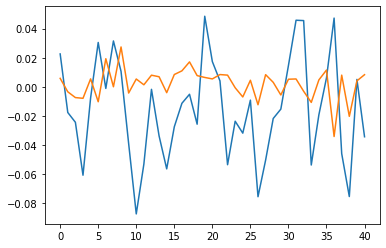

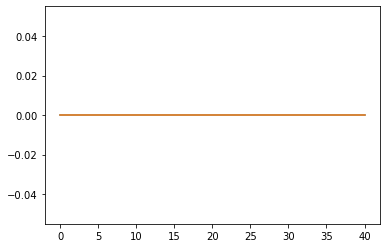

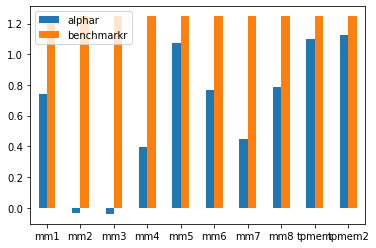

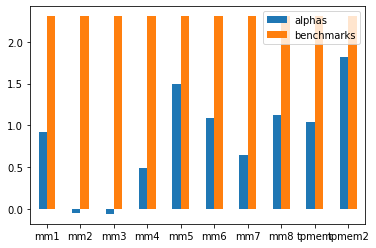

In [39]:
sig=get_signalact2(mi24(data), logrets(data), delay=1)

In [40]:
# slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

def mi25(data):
    mi=[]
    
    for i in range(len(data)):
        if len(data[i])>0:
            slowk, slowd=ta.STOCH(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
            k=np.nan_to_num(slowk, 0)
            d=np.nan_to_num(slowd, 0)
            mi.append(np.asarray(k))
    return getleneq(mi)[1]  


mi25(data)

array([[ 0.        ,  0.        ,  0.        , ..., 58.11288988,
        32.44516755, 29.53483714],
       [ 0.        ,  0.        ,  0.        , ..., 54.6606941 ,
        47.01364167, 24.61115268],
       [ 0.        ,  0.        ,  0.        , ..., 71.29257987,
        69.67256675, 56.80650065],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 31.95143111,
        40.66839387, 46.7870233 ],
       [ 0.        ,  0.        ,  0.        , ..., 22.62825258,
        19.76286983, 14.09465692],
       [ 0.        ,  0.        ,  0.        , ..., 93.46517918,
        77.81020407, 49.05405906]])

1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


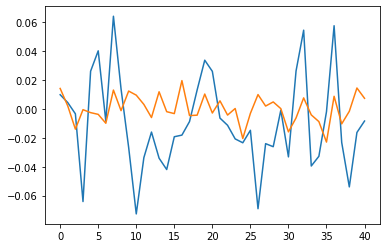

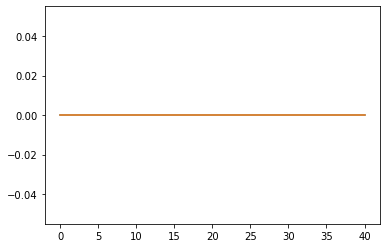

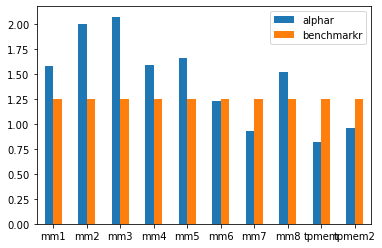

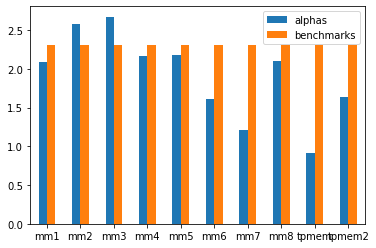

In [41]:
sig=get_signalact2(mi25(data), logrets(data), delay=1)

In [42]:
# fastk, fastd = STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)

def mi26(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            fastk, fastd=ta.STOCHF(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), fastk_period=5, fastd_period=3, fastd_matype=0)
            l=np.nan_to_num(fastk, 0)
            m=np.nan_to_num(fastd, 0)
            mi.append(np.asarray(l))
    return getleneq(mi)[1]
mi26(data)

array([[ 0.        ,  0.        ,  0.        , ..., 18.26160467,
        20.81173899, 49.53116776],
       [ 0.        ,  0.        ,  0.        , ..., 51.99996948,
        18.7255317 ,  3.10795686],
       [ 0.        ,  0.        ,  0.        , ..., 54.40118335,
        78.06616337, 37.95215522],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 43.02542059,
        49.55035745, 47.78529186],
       [ 0.        ,  0.        ,  0.        , ..., 16.96161167,
        12.04268736, 13.27967174],
       [ 0.        ,  0.        ,  0.        , ..., 95.5879779 ,
        50.18857495,  1.38562432]])

1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


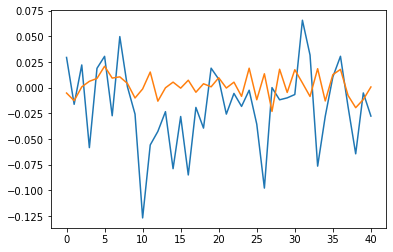

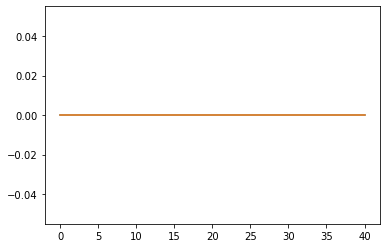

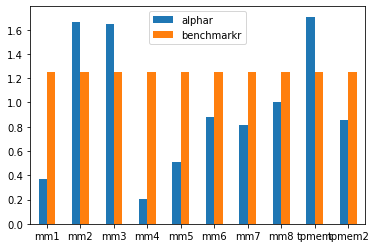

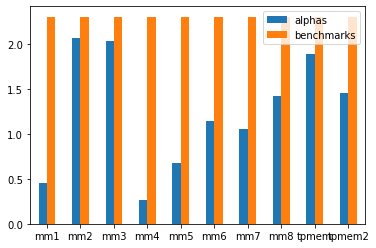

In [43]:
sig=get_signalact2(mi26(data), logrets(data), delay=1)

In [44]:
# fastk, fastd = STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)

def mi27(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            fastk, fastd=ta.STOCHRSI(np.asarray(list(data[i]['Close'])), timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
            j=np.nan_to_num(fastk, 0)
            l=np.nan_to_num(fastd, 0)
            mi.append(np.asarray(j))
    return getleneq(mi)[1]
mi27(data)

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  34.5795288 ],
       [  0.        ,   0.        ,   0.        , ...,  40.00197658,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  25.83229375,
        100.        ,   3.63625173],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  43.50453027,
         84.50859483,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 100.        ,
          0.        ,   0.        ]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


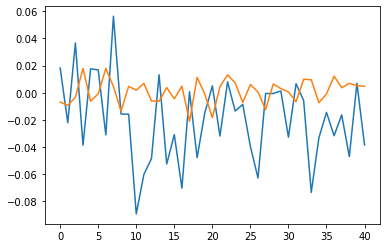

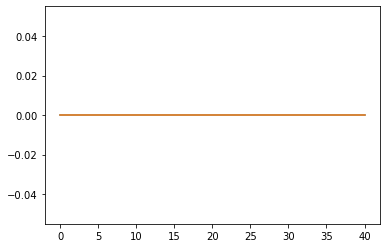

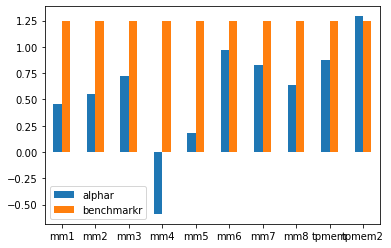

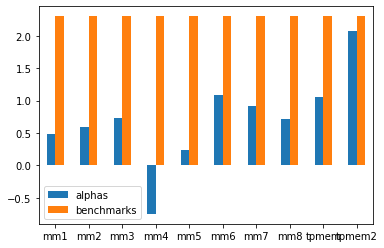

In [45]:
sig=get_signalact2(mi27(data), logrets(data), delay=1)

In [46]:
# real = TRIX(close, timeperiod=30)

def mi28(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            s=ta.TRIX(np.asarray(list(data[i]['Close'])), timeperiod=30)
            x=np.nan_to_num(s,0)
            mi.append(np.asarray(x))
    return getleneq(mi)[1]
mi28(data)

array([[ 0.        ,  0.        ,  0.        , ...,  0.11067921,
         0.11700992,  0.12234378],
       [ 0.        ,  0.        ,  0.        , ...,  0.4042657 ,
         0.39455383,  0.38349822],
       [ 0.        ,  0.        ,  0.        , ...,  0.0931444 ,
         0.09267829,  0.09188105],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.04322024,
         0.03804541,  0.03253012],
       [ 0.        ,  0.        ,  0.        , ..., -0.15177105,
        -0.15675786, -0.16235038],
       [ 0.        ,  0.        ,  0.        , ...,  0.01032239,
         0.01060812,  0.01043951]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


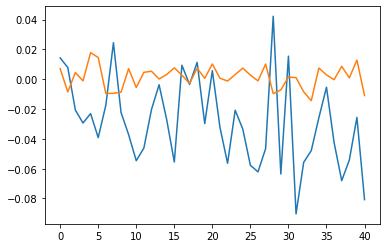

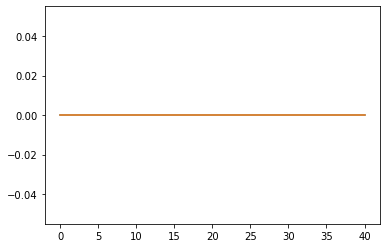

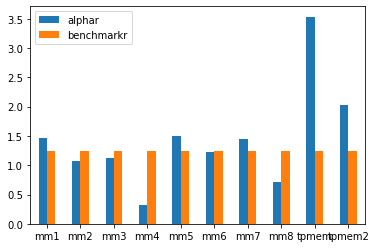

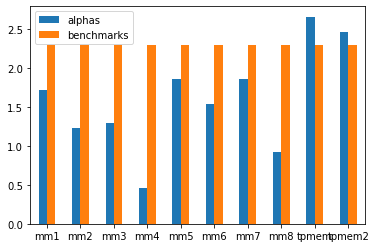

In [47]:
sig=get_signalact2(mi28(data), logrets(data), delay=1)

In [48]:
# real = ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)

def mi29(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            
            w=ta.ULTOSC(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod1=7, timeperiod2=14, timeperiod3=28)
            k=np.nan_to_num(w,0)
            mi.append(np.asarray(k))
    return getleneq(mi)[1]
mi29(data)

array([[ 0.        ,  0.        ,  0.        , ..., 46.97538236,
        48.98983619, 49.95490823],
       [ 0.        ,  0.        ,  0.        , ..., 53.50090886,
        50.88761645, 45.96196741],
       [ 0.        ,  0.        ,  0.        , ..., 56.92654186,
        63.34403349, 58.6400944 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 51.92628887,
        52.90302957, 50.57235094],
       [ 0.        ,  0.        ,  0.        , ..., 44.62277941,
        40.54047179, 37.09665394],
       [ 0.        ,  0.        ,  0.        , ..., 60.04374085,
        57.48626561, 50.39525017]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41
1006
41


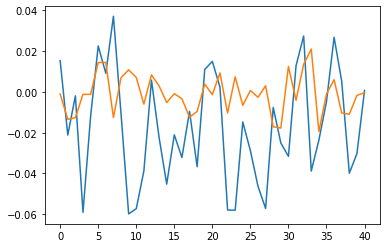

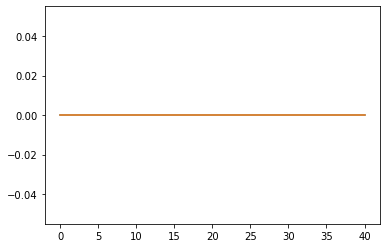

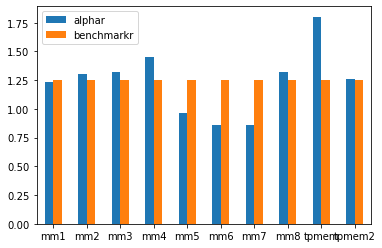

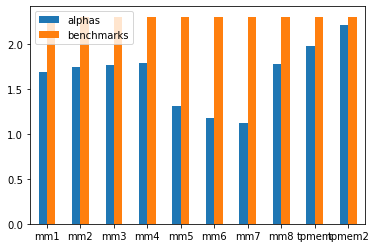

In [49]:
sig=get_signalact2(mi29(data), logrets(data), delay=1)

In [50]:
# real = WILLR(high, low, close, timeperiod=14)

def mi30(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            
            h=ta.WILLR(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            m=np.nan_to_num(h,0)
            mi.append(np.asarray(m))
    return getleneq(mi)[1]
mi30(data)
        

array([[  0.        ,   0.        ,   0.        , ..., -48.32048785,
        -79.14916579, -50.46883224],
       [  0.        ,   0.        ,   0.        , ..., -45.05178154,
        -84.26963573, -97.69189928],
       [  0.        ,   0.        ,   0.        , ..., -49.92738717,
        -37.40518351, -48.70097157],
       ...,
       [  0.        ,   0.        ,   0.        , ..., -81.79432495,
        -82.65997714, -87.02033864],
       [  0.        ,   0.        ,   0.        , ..., -85.87225631,
        -90.69492209, -92.22614825],
       [  0.        ,   0.        ,   0.        , ...,  -3.29513218,
        -28.99555435, -93.79579848]])

1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1006
41
1006
41
1006
41
1006
41
1006
41


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


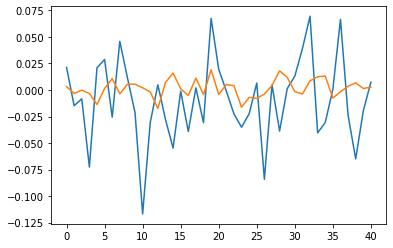

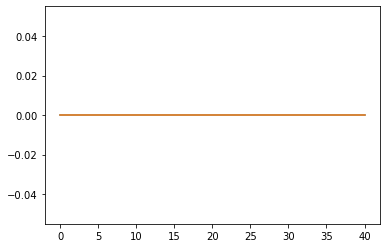

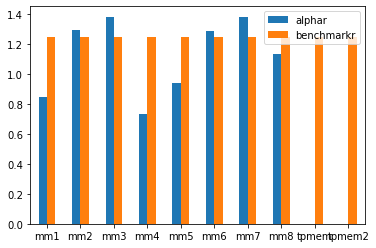

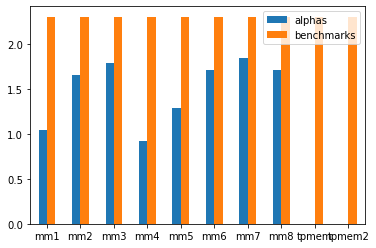

In [51]:
sig=get_signalact2(mi30(data), logrets(data), delay=1)